Polinomios por tramos: 
 x = [0,1]
0.00622009569377987*x**3 + 0.29377990430622*x + 0.5


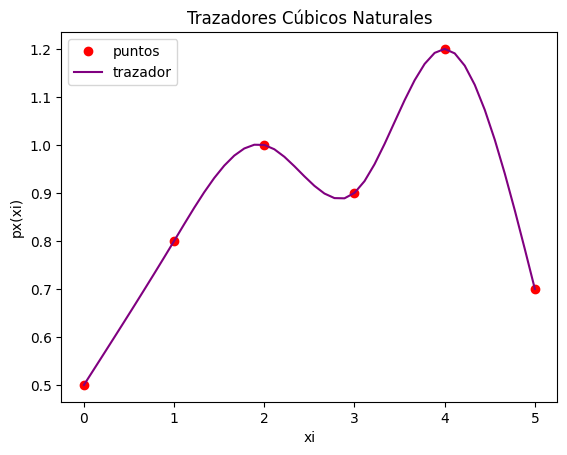

In [4]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import csv

def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

# PROGRAMA -----------------------
# INGRESO , Datos
with open('datos.csv') as file:
    # Crear un lector CSV
    reader = csv.reader(file, delimiter=',')

xi = np.array([0, 1, 2, 3, 4, 5])
fi = np.array([0.5, 0.8, 1.0, 0.9, 1.2, 0.7])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1, 5, 100):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='purple')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

 f =  0.0600000000000001*x + 0.7
coef_correlación   r  =  0.46212479054244454
coef_determinación r2 =  0.21355932203389824
21.36% de los datos
     está descrito en el modelo lineal


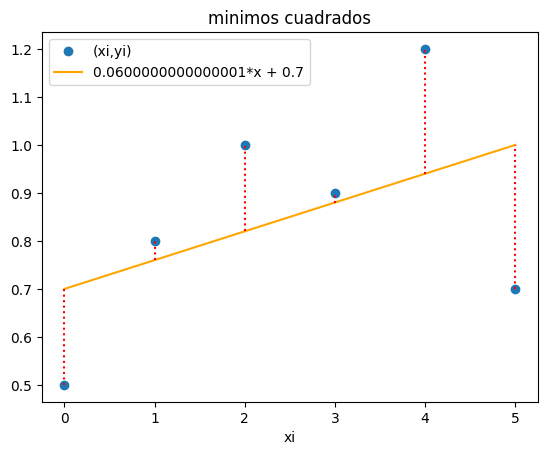

In [7]:
# mínimos cuadrados, regresión con polinomio grado 1
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
xi = np.array([0, 1, 2, 3, 4, 5])
yi = np.array([0.5, 0.8, 1.0, 0.9, 1.2, 0.7])

# PROCEDIMIENTO
xi = np.array(xi,dtype=float)
yi = np.array(yi,dtype=float)
n  = len(xi)

# sumatorias y medias
xm  = np.mean(xi)
ym  = np.mean(yi)
sx  = np.sum(xi)
sy  = np.sum(yi)
sxy = np.sum(xi*yi)
sx2 = np.sum(xi**2)
sy2 = np.sum(yi**2)

# coeficientes a0 y a1
a1 = (n*sxy-sx*sy)/(n*sx2-sx**2)
a0 = ym - a1*xm

# polinomio grado 1
x = sym.Symbol('x')
f = a0 + a1*x

fx = sym.lambdify(x,f)
fi = fx(xi)

# coeficiente de correlación
numerador = n*sxy - sx*sy
raiz1 = np.sqrt(n*sx2-sx**2)
raiz2 = np.sqrt(n*sy2-sy**2)
r = numerador/(raiz1*raiz2)

# coeficiente de determinacion
r2 = r**2
r2_porcentaje = np.around(r2*100,2)

# SALIDA
# print('ymedia =',ym)
print(' f = ',f)
print('coef_correlación   r  = ', r)
print('coef_determinación r2 = ', r2)
print(str(r2_porcentaje)+'% de los datos')
print('     está descrito en el modelo lineal')

# grafica
plt.plot(xi,yi,'o',label='(xi,yi)')
# plt.stem(xi,yi,bottom=ym,linefmt ='--')
plt.plot(xi,fi, color='orange',  label=f)

# lineas de error
for i in range(0,n,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle ='dotted')
plt.legend()
plt.xlabel('xi')
plt.title('minimos cuadrados')
plt.show()